* 정밀도  
정밀도(precision)는 양성 예측의 정확도를 의미.  
$TP \over TP + FP$ . 
정밀도는 음성을 양성으로 잘못 판단하면 문제가 되는 경우가 사용한다. 예를 들어 스팸 메일 필터링 시스템에서 스팸메일을 양성, 일반 메일을 음성이라고 할때, 스팸을 일반메일로 잘못 판단하는 경우(FP)는 필터링을 제대로 못해줫네 지우면 끝이지만,  
반대의 경우 실제 일반메일인데 스팸메일로 잘못 판단한 경우(FN) 업무상 중요한 메일을 받지 못할 수 있습니다.  
참고로 검출하기 원하는 상태를 보통 양성으로 놓는 경우가 많다. 내가 더 중요하게 봐야할 부분에 맞는 평가 지표를 고르는 것이 중요한것 같다.

* 재현율  
재현율(recall) 은 실제 양성 값(TP + FN)중 양성으로 잘 예측한 값(TP)의 비율. 민감도라고도 하고 TPR이라고도 한다.  
$TP \over TP + FN$  
재현율은 양성을 음성으로 잘못 판단하면 문제가 되는 경우 사용한다. 암을 진단하는 상황을 예로 들면 암인데(양성) 암이 아니라고 진단하면 큰 문제가 발생한다. 반대로 암이 아닌데(음성) 암이라고 판단하면 치료비의 낭비 뭐 이런일은 있을수 있지만 솔직히 생명에 지장까지 없을 것.  


* F1 점수
F1 점수(F1 score)는 정밀도와 재현율을 조합한 평가지표이다.

* 참 음성비율(TNR)은 음성을 얼마나 정확히 예측하는지 나타내는 지표. 특이도(specificity)라고도 한다.
## $TN \over TN + FP$ . 
FPR은 1 - TNR이다. 즉  
## $FP \over TN + FP$

* 라벨 인코딩

In [1]:
from sklearn.preprocessing import LabelEncoder

fruits = ['사과', '블루베리', '바나나', '귤', '블루베리', '바나나', '바나나', '사과']

label_encoder = LabelEncoder()
fruits_label_encoder  = label_encoder.fit_transform(fruits)

print('레이블 인코딩 적용 후 데이터: ', fruits_label_encoder)

레이블 인코딩 적용 후 데이터:  [3 2 1 0 2 1 1 3]


* 원-핫 인코딩에서 명목형 피처에 고윳값이 상당히 많을 떄 어떻게 해결하는가  
    * **비슷한 고윳값끼리 그룹화**:  그룹화하면 해당 명목형 피처의 고육값 개수가 줄어드는 효과가 있다.
    * **빈도가 낮은 고윳값을 기타**(etc)**로 처리하기**: 비슷한 고윳값끼리 그룹화 하는 방법과 비슷하다. 빈도가 낮은 고윳값들을 묶어 '기타 고윳값'으로 일괄 처리하는 방법이다.
    * **다른 인코딩 적용하기**: 타깃 인코딩, 프리퀀시 인코딩 등 그 외 인코딩 기법이 있다. 다른 인코딩 기법도 각자 단점이 있긴 하다.

In [2]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

fruits = ['사과', '블루베리', '바나나', '귤', '블루베리', '바나나', '바나나', '사과']

label_encoder = LabelEncoder()
onehot_encoder = OneHotEncoder()

fruits_label_encoded = label_encoder.fit_transform(fruits)
fruits_onehot_encoded = onehot_encoder.fit_transform(fruits_label_encoded.reshape(-1, 1))

print('원-핫 인코딩 적용 후 데이터:\n', fruits_onehot_encoded.toarray())


원-핫 인코딩 적용 후 데이터:
 [[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]]


In [3]:
import pandas as pd

pd.get_dummies(fruits)

,귤,바나나,블루베리,사과
0,0,0,0,1
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,0,1,0
5,0,1,0,0
6,0,1,0,0
7,0,0,0,1


* min-max 정규화

In [4]:
import pandas as pd

height_weight_dict = {'키': [1.7, 1.5, 1.8], '몸무게': [75, 55, 60]}
df = pd.DataFrame(height_weight_dict, index=['광일', '혜성', '덕수'])

print(df)

      키  몸무게
광일  1.7   75
혜성  1.5   55
덕수  1.8   60


In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df)
df_scaled = scaler.transform(df)

In [6]:
print(df_scaled)

[[0.66666667 1.        ]
 [0.         0.        ]
 [1.         0.25      ]]


* 선형 회귀 모델

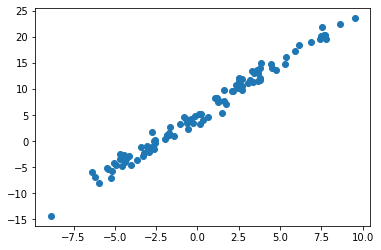

In [7]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

w0 = 5
w1 = 2
noise = np.random.randn(100, 1) #노이즈

x = 4 * np.random.randn(100, 1) #0~4 사이 실수값 100개 생성
y = w1 * x + w0 + noise

plt.scatter(x, y);

In [8]:
from sklearn.linear_model import LinearRegression


linear_reg_model = LinearRegression()
linear_reg_model.fit(x, y)

print(f'y절편(wo): {linear_reg_model.intercept_}')
print(f'회귀계수(w1): {linear_reg_model.coef_}')

y절편(wo): [5.05088198]
회귀계수(w1): [[2.02720921]]


* XGBoost와 LightGBM의 특장점
    * 피처 스케일링이 따로 필요 없다. 데이터의 절대적인 크기보다는 대소 관계에 영향을 받기 때문이다.
    * 레이블 인코딩을 적용해도 된다. 레이블 인코딩은 단점이 있다고 했지만, 트리 기반 모델 특성상 분기를 거듭하면서 레이블 인코딩된 피처에서도 정보를 잘 추출할 수 있기 때문이다.
    * 결측값을 알아서 처리해준다.(그럼에도 명확하게 하려면 결측값을 별도로 처리하는 습관을 들이는게 바람직하다.)

* 반면 선형 모델은 피처 스케일링, 결측값 처리, 원-핫 인코딩을 적용해줘야 일반적으로 성능이 좋아진다.